# Overview

The data has been split into two groups:

training set (train.csv)
test set (test.csv)

**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("C:/Users/HP/Downloads/train.csv")
test = pd.read_csv("C:/Users/HP/Downloads/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Variable Description

1. PassengerId:-     unique id number to each passenger
2. Survived:-        passenger survive(1) or died(0)
3. Pclass:-          passenger class
4. Name:-            name
5. Sex:-             gender of passenger
6. Age:-             age of passenger
7. SibSp:-           number of siblings/spouses
8. Parch:-           number of parents/children
9. Ticket:-          ticket number
10. Fare:-           amount of money spent on ticket
11. Cabin:-          cabin category
12. Embarked:-       port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Statistical Measurements And Details Of The DataSet

In [11]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [12]:
train.isna().sum().describe(include = 'all')

count     12.000000
mean      72.166667
std      200.183022
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max      687.000000
dtype: float64

### Missing Values and Inmputation 

In [13]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
train.columns[train.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [16]:
train["Embarked"].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
train["Embarked"] = train["Embarked"].fillna("S")

In [50]:
test["Embarked"] = test["Embarked"].fillna("S")

In [18]:
train[train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [19]:
train["Cabin"] = train["Cabin"].fillna("NaN")

In [51]:
test["Cabin"] = test["Cabin"].fillna("NaN")

The null values in **Cabin** indicates that they are not alloted a personal cabin that's way we fill it as **NaN**

In [20]:
train[train["Cabin"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [21]:
train["Age"].fillna(train["Age"].mean(), inplace=True)

In [52]:
test["Age"].fillna(test["Age"].mean(), inplace=True)

In [22]:
train[train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [54]:
test["Fare"].fillna(test["Fare"].median(), inplace=True)

In [23]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [55]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [61]:
train.drop(['Cabin'],axis=1,inplace=True)
test.drop(['Cabin'],axis=1,inplace=True)

In [24]:
print("There are ", len(train.Name.str.rsplit(",", n=1, expand=True)[0].value_counts()), " unique Names.")
print("There are ", len(train.SibSp.value_counts()), " unique values of number of Siblings / Spouses.")
print("There are ", len(train.Parch.value_counts()), " unique values of number of Parents / Children.")
print("There are ", len(train.Ticket.value_counts()), " unique Tickets numbers.")
print("There are ", len(train.Cabin.value_counts()), " unique Cabin values.")
print("There are ", len(train.Embarked.value_counts()), " unique Embarked values.")
print("There are ", (train.shape), " rows and columns respectively in data set.")

There are  667  unique Names.
There are  7  unique values of number of Siblings / Spouses.
There are  7  unique values of number of Parents / Children.
There are  681  unique Tickets numbers.
There are  148  unique Cabin values.
There are  3  unique Embarked values.
There are  (891, 12)  rows and columns respectively in data set.


In [25]:
train.groupby("Pclass")["Survived"].value_counts().unstack()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [26]:
train.groupby("Sex")["Survived"].value_counts().unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


In [27]:
train.groupby("Embarked")["Survived"].value_counts().unstack()

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


In [28]:
train.groupby("SibSp")["Survived"].value_counts().unstack()

Survived,0,1
SibSp,,
0,398.0,210.0
1,97.0,112.0
2,15.0,13.0
3,12.0,4.0
4,15.0,3.0
5,5.0,NaN
8,7.0,NaN


In [29]:
train.loc[(train["SibSp"]==5) | (train["SibSp"]==8),["SibSp", "Survived"]]

,SibSp,Survived
59,5,0
71,5,0
159,8,0
180,8,0
201,8,0
324,8,0
386,5,0
480,5,0
683,5,0
792,8,0


In [30]:
train.groupby("Parch")["Survived"].value_counts().unstack()

Survived,0,1
Parch,,
0,445.0,233.0
1,53.0,65.0
2,40.0,40.0
3,2.0,3.0
4,4.0,NaN
5,4.0,1.0
6,1.0,NaN


In [31]:
train.loc[(train["Parch"]==4) | (train["Parch"]==6),["Parch", "Survived"]]

,Parch,Survived
167,4,0
360,4,0
438,4,0
567,4,0
678,6,0


In [32]:
def bar_plot(variable):
    """
    input = variable ex: "Sex"
    output = bar plot & value count
    """
    #Get feature
    var = train[variable]
    #Count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    #Visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{} : \n{} : ".format(variable,varValue))

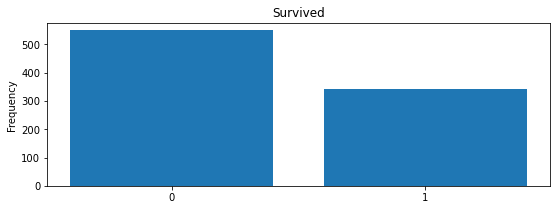

Survived : 
0    549
1    342
Name: Survived, dtype: int64 : 


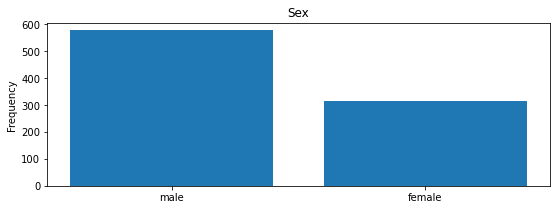

Sex : 
male      577
female    314
Name: Sex, dtype: int64 : 


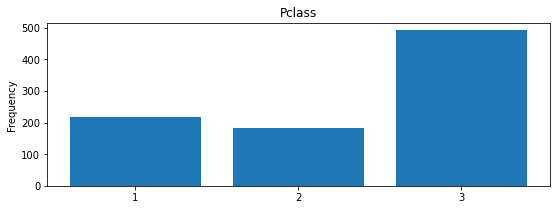

Pclass : 
3    491
1    216
2    184
Name: Pclass, dtype: int64 : 


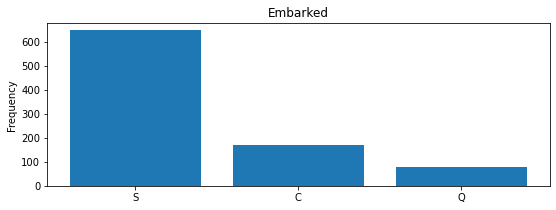

Embarked : 
S    646
C    168
Q     77
Name: Embarked, dtype: int64 : 


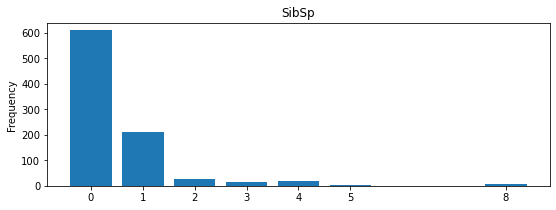

SibSp : 
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64 : 


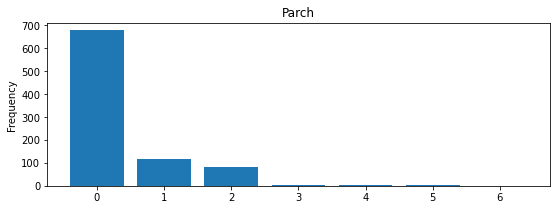

Parch : 
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64 : 


In [33]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for i in category1:
    bar_plot(i)

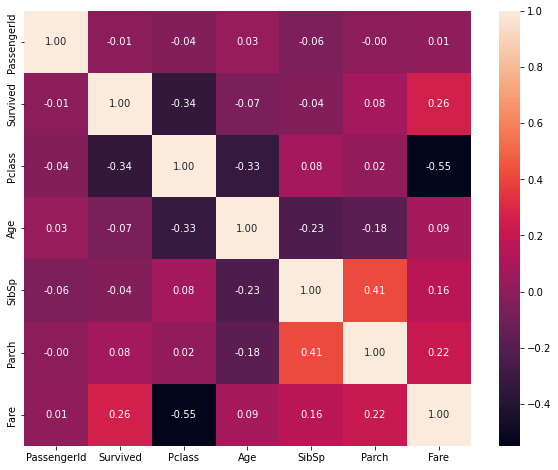

In [34]:
plt.figure(figsize = (10,8))
sns.heatmap(train.corr(), annot = True, fmt = ".2f")
plt.show()

- Fare feature seems to have correlation with survived feature (0.26).

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

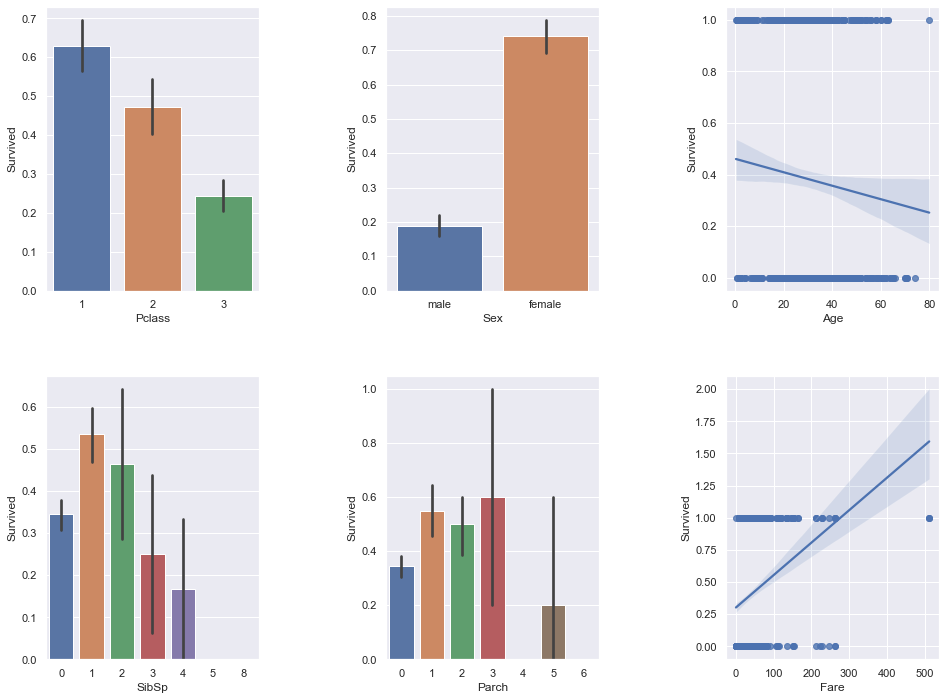

In [35]:
sns.set_theme()
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
plt.subplots_adjust(hspace = 0.3, wspace = 0.6)

sns.barplot(data=train, x='Pclass', y='Survived', ax=axes[0,0])
sns.barplot(data=train, x='Sex', y='Survived', ax=axes[0,1])
sns.regplot(data=train, x='Age', y='Survived', ax=axes[0,2])
sns.barplot(data=train, x='SibSp', y='Survived', ax=axes[1,0])
sns.barplot(data=train, x='Parch', y='Survived', ax=axes[1,1])
sns.regplot(data=train, x='Fare', y='Survived', ax=axes[1,2])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

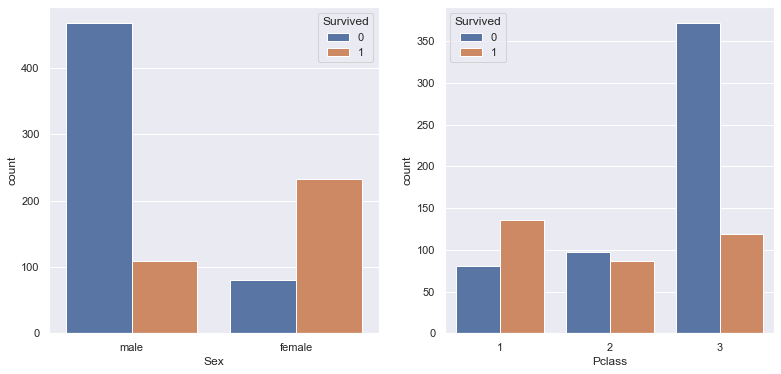

In [36]:
sns.set_theme()
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
sns.countplot(data=train, x='Sex', hue='Survived', ax=axes[0])
sns.countplot(data=train, x='Pclass', hue='Survived', ax=axes[1])

On the plots we can observe that:

- Pclass - The higher the ticket class, the higher chance of survival,
- Sex - Significantly higher chance of survival amongst women,
- Age - Based on the regression line one can expect that the younger the person, the higher chance of survival, but a further analysis is needed, -SibSp and Parch - values 1, 2 and 3 seem to have a higher chance of survival,
- Fare - Based on the regression line, one can expect that the more expensive the ticket was, the higher the chance of survival

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
bins= [0,5,12,18,24,35,60,np.inf]
labels = ['Baby','Child','Teenager','Student','Young Adult','Adult','Senior']

train['Age_Group'] = pd.cut(train.Age,bins,labels = labels)

# Create a new DataFrame with only "AgeGroup" and "Survived" columns
new_data = train[['Age_Group', 'Survived']]


<Figure size 1080x720 with 0 Axes>

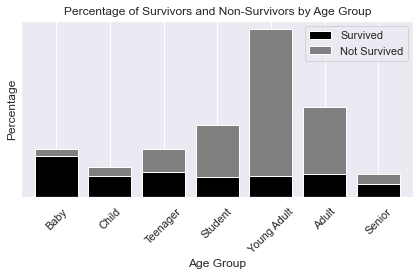

In [43]:
# Assuming you have a DataFrame called 'train' with columns 'AgeGroup' and 'Survived'

# Increase the figure size
plt.figure(figsize=(15, 10))

# Group the data by 'AgeGroup' and 'Survived' and calculate the count
grouped = train.groupby(['Age_Group', 'Survived']).size().unstack()

# Calculate the total for each age group
total = grouped.sum(axis=1)

# Calculate the percentage of survivors in each age group
grouped['Survived Percentage'] = (grouped[1] / total) * 100

# Create the stacked barplot
ax = grouped[['Survived Percentage', 0]].plot(kind='bar', stacked=True, color=['black', 'grey'], width=0.8)

# Customize the plot
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Percentage of Survivors and Non-Survivors by Age Group')
plt.legend(['Survived', 'Not Survived'], loc='upper right')
plt.xticks(rotation=45)

# Remove gridlines
ax.set_yticks([])  # Remove y-axis tick marks and labels

# Show the plot
plt.tight_layout()
plt.show()



<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

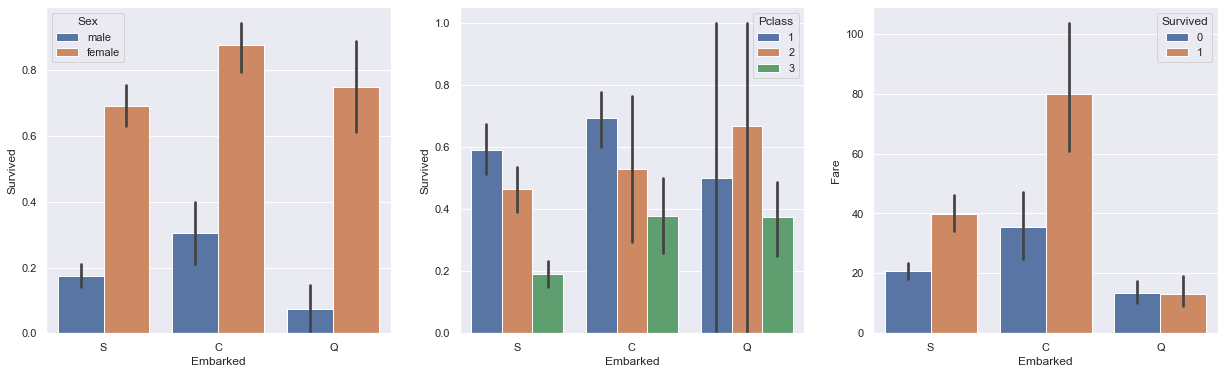

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(21, 6))
sns.barplot(data=train, x='Embarked', y='Survived', hue='Sex', ax=axes[0])
sns.barplot(data=train, x='Embarked', y='Survived', hue='Pclass', ax=axes[1])
sns.barplot(data=train, x='Embarked', y='Fare', hue='Survived', ax=axes[2])

- On those graphs we can observe that passengers embarked at port C had higher chance of survival.
- From the first plot, we can say that it was independent from the gender of the passenger.
- However, plot 2 and 3 especially can suggest that this relation may be correlated with the fact that those passengers paid more for the tickets, what was previously shown as an important factor for the chance of survival.

In [42]:
print("The average price of ticket for passengers embarked in C was: ", train[train['Embarked'] == 'C']['Fare'].mean())
print("The average price of ticket for passengers embarked in S was: ", train[train['Embarked'] == 'S']['Fare'].mean())
print("The average price of ticket for passengers embarked in Q was: ", train[train['Embarked'] == 'Q']['Fare'].mean())

The average price of ticket for passengers embarked in C was:  59.95414404761905
The average price of ticket for passengers embarked in S was:  27.243651393188795
The average price of ticket for passengers embarked in Q was:  13.276029870129872


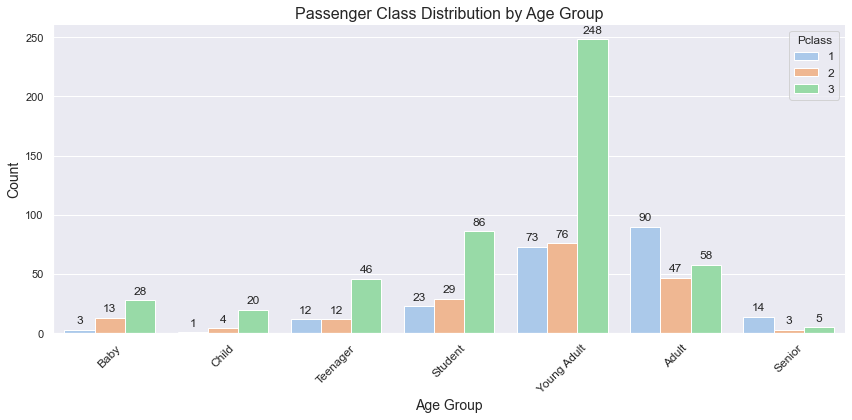

In [46]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=train, x='Age_Group', hue='Pclass', palette='pastel')

plt.xlabel("Age Group", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Count", fontsize=14)
plt.title("Passenger Class Distribution by Age Group", fontsize=16)
plt.legend(title="Pclass", title_fontsize=12, fontsize=12, loc='upper right')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 5),
                ha='center', va='baseline', fontsize=12)

sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_22808\3964479998.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


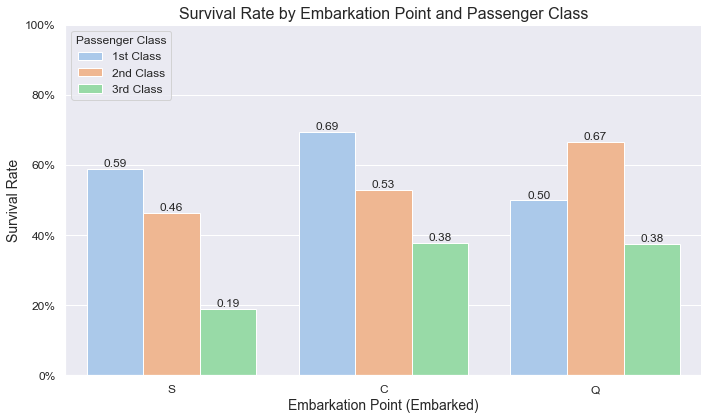

In [47]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=train, x='Embarked', y='Survived', hue='Pclass', palette='pastel', ci=None)


plt.xlabel("Embarkation Point (Embarked)", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Survival Rate", fontsize=14)
plt.title("Survival Rate by Embarkation Point and Passenger Class", fontsize=16)


plt.ylim(0, 1)
plt.yticks(fontsize=12)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend(title="Passenger Class", title_fontsize=12, fontsize=12, loc='upper left',
           labels=["1st Class", "2nd Class", "3rd Class"])
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12)

# Remove the top and right spines for a cleaner look
sns.despine(right=True, top=True)

# Show the plot
plt.tight_layout()
plt.show()

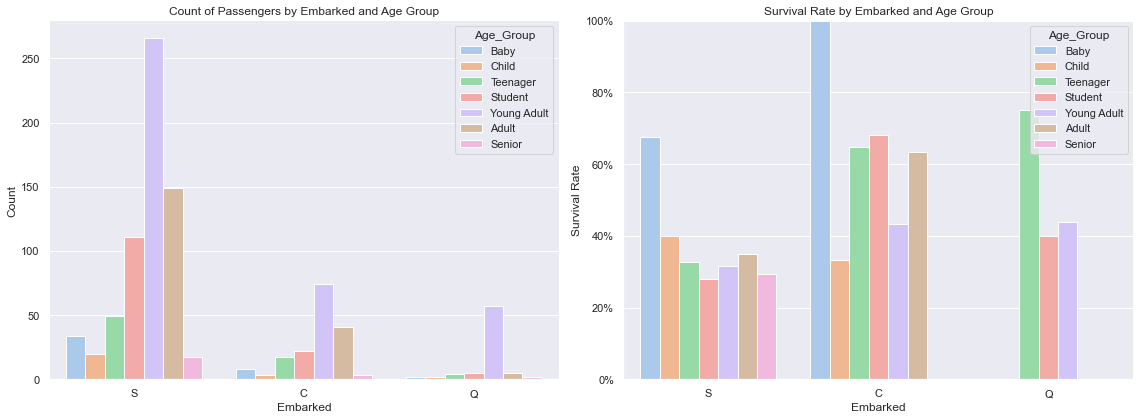

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(data=train, x='Embarked', hue='Age_Group', palette='pastel', ax=axes[0])
axes[0].set_xlabel("Embarked")
axes[0].set_ylabel("Count")
axes[0].set_title("Count of Passengers by Embarked and Age Group")

sns.barplot(data=train, x='Embarked', y='Survived', hue='Age_Group', palette='pastel', ax=axes[1],ci=None)
axes[1].set_xlabel("Embarked")
axes[1].set_ylabel("Survival Rate")
axes[1].set_title("Survival Rate by Embarked and Age Group")

# Customize y-axis labels to show percentages
axes[1].set_ylim(0, 1)
axes[1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes[1].set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

sns.despine(right=True, top=True, ax=axes[0])
sns.despine(right=True, top=True, ax=axes[1])
plt.tight_layout()
plt.show()

- Left Subplot (Countplot - Passenger Count by Embarkation Point and Age Group):

- Age Group Influence of Embarkation Point: The left subplot shows how the age group distribution differs between embarkation ports. For instance, Cherbourg (C) appears to have a higher percentage of young adults, but Southampton (S) appears to have more students. This raises the possibility that passenger demographics may have been impacted by embarkation places.

- Age Group Diversity: The countplot shows the range of ages among passengers from various sites of departure. Understanding this variety might be important for future study since it may reveal differences in passengers' socioeconomic origins or trip objectives.

- Right Subplot (Barplot with Survival Rate - Survival Rate by Embarkation Point and Age Group):

- Survival Rate Patterns: The right subplot sheds light on the ways in which survival rates vary according to age group and site of embarkation. Notably, Cherbourg (C) seems to have greater survival rates across the majority of age categories, suggesting that passengers sailing from Cherbourg had a higher chance of surviving.

- Age Group Influence on Survival: The barplot enables us to draw the conclusion that age groupings affected survival results. For instance, across all embarkation ports, young people and adults often had higher survival rates than other age groups.

- Cherbourg Exception: Cherbourg stands out with continuously greater percentages of survival, indicating that characteristics particular to passengers from Cherbourg may have contributed to their increased odds of surviving, regardless of age group.

In [68]:
train_df = train.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Age_Group'],axis=1)
test_df = test.drop(['PassengerId', 'Name', 'Ticket', 'Fare',],axis=1)

In [67]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S
887,1,1,female,19.000000,0,0,S
888,0,3,female,29.699118,1,2,S
889,1,1,male,26.000000,0,0,C


In [72]:
# ----->> Training Dataframe <<-------

train_data = train_df.copy()

# Create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)

# Drop unnecessary columns
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

# Perform one-hot encoding
training = pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])


# Assign the final DataFrames
final_train = training
final_train.head()

,Survived,Age,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,0,0,0,1,0,0,1,0,1
1,1,38.0,0,1,0,0,1,0,0,1,0
2,1,26.0,1,0,0,1,0,0,1,1,0
3,1,35.0,0,1,0,0,0,0,1,1,0
4,0,35.0,1,0,0,1,0,0,1,0,1


In [73]:
# ----->> Testing Dataframe <<-------

test_data = test_df.copy()

# Create categorical variable for traveling alone
test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)


# Drop unnecessary columns
test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)


# Perform one-hot encoding
testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])


# Assign the final DataFrames
final_test = testing
final_test.head()

,Age,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,34.5,1,0,0,1,0,1,0,0,1
1,47.0,0,0,0,1,0,0,1,1,0
2,62.0,1,0,1,0,0,1,0,0,1
3,27.0,1,0,0,1,0,0,1,0,1
4,22.0,0,0,0,1,0,0,1,1,0


In [59]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix # for confusion matrix

In [74]:
X= final_train.drop('Survived',axis=1)
y = final_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=39)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("SVM Linear", SVC(kernel="linear")),
    ("SVM Radial", SVC(kernel="rbf", gamma=0.1))
]

accuracy_df = pd.DataFrame(columns=["Model", "Accuracy", "CV_Scores", "CV_Mean"])
for model_name, model in models:
    model.fit(X_train_scaled, y_train)
    accuracy = model.score(X_test_scaled, y_test)
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=StratifiedKFold(n_splits=5))
    cv_mean = cv_scores.mean()

    accuracy_df = pd.concat([accuracy_df, pd.DataFrame({"Model": [model_name], "Accuracy": [accuracy], "CV_Scores": [cv_scores], "CV_Mean": [cv_mean]})], ignore_index=True)

print(accuracy_df)

                 Model  Accuracy  \
0  Logistic Regression  0.802239   
1        Random Forest  0.809701   
2  K-Nearest Neighbors  0.813433   
3          Naive Bayes  0.764925   
4        Decision Tree  0.813433   
5           SVM Linear  0.798507   
6           SVM Radial  0.850746   

                                           CV_Scores   CV_Mean  
0  [0.864, 0.768, 0.696, 0.8387096774193549, 0.75...  0.784955  
1  [0.784, 0.76, 0.688, 0.8145161290322581, 0.806...  0.770594  
2     [0.752, 0.696, 0.68, 0.8387096774193549, 0.75]  0.743342  
3  [0.808, 0.752, 0.648, 0.782258064516129, 0.790...  0.756116  
4  [0.784, 0.752, 0.696, 0.7983870967741935, 0.79...  0.764142  
5  [0.872, 0.744, 0.688, 0.8225806451612904, 0.78...  0.781768  
6  [0.8, 0.736, 0.696, 0.8548387096774194, 0.7983...  0.777045  


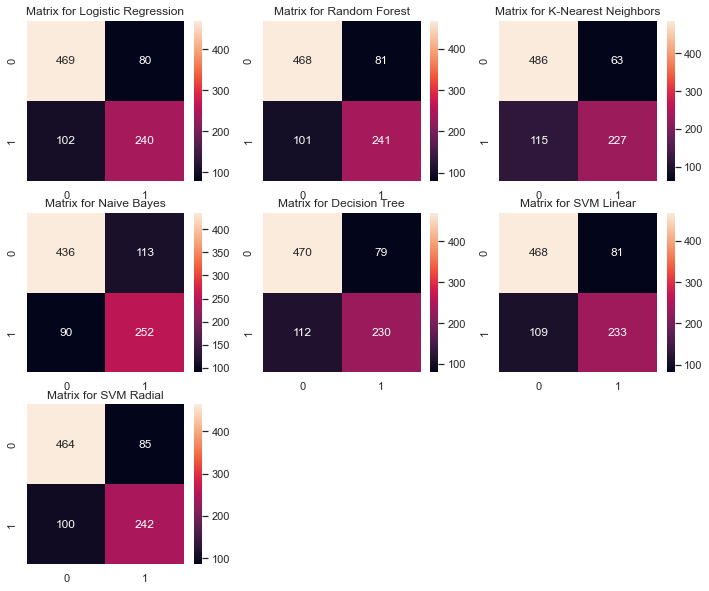

In [76]:
from sklearn.model_selection import cross_val_predict

# Calculating the no. of required subplots based on the number of models that i needed
num_models = len(models)
num_rows = (num_models - 1) // 3 + 1  # Rows needed
num_cols = min(num_models, 3)  # Columns needed

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for (model_name, model), ax in zip(models, axes.flatten()):
    y_pred = cross_val_predict(model, X, y, cv=10)
    conf_matrix = confusion_matrix(y, y_pred)
    sns.heatmap(conf_matrix, ax=ax, annot=True, fmt='2.0f')
    ax.set_title(f'Matrix for {model_name}')
    
for i in range(num_models, num_rows * num_cols):  # this function will remove any extra subplots
    fig.delaxes(axes.flatten()[i])
plt.show()

**Using Confusion Matrix to Interpret :** The left diagonal displays the percentage of accurate forecasts for each class, while the right diagonal displays the percentage of inaccurate guesses. Let's look at the first Logistic Regression-plot: * 1) The total number of accurate predictions is 469 (for the deceased) plus 239 (for the living), with the mean CV accuracy being (469+232)/891 = 79.5%, which we did already obtain. * 2) Mistakes: 80 survivors were incorrectly classified as dead and 103 deceased individuals as alive. As a result, by predicting the dead as survivors, it has committed more errors. By examining all the matrices, we can conclude that Radial-SVM and Logistic Regression has a larger likelihood of correctly predicting passengers who died.